In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

sns.set(style="white")

In [2]:
cardio_data = pd.read_csv('../Data/cardio_train.csv', sep=';')
cardio_data.dropna(inplace=True)
cardio_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Exercise 1

### 1.1

a)

In [3]:
cardio = pd.value_counts(cardio_data['cardio'] == 1)

cardio = pd.DataFrame({'cardio': cardio.index, 'values': cardio.values})
cardio

C:\Users\first\AppData\Local\Temp\ipykernel_10996\1984958856.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cardio = pd.value_counts(cardio_data['cardio'] == 1)


,cardio,values
0,False,35021
1,True,34979


b)

In [4]:
cholestrol = pd.value_counts(cardio_data['cholesterol'])
cholestrol = pd.DataFrame({'cholestrol': cholestrol.index, 'values': cholestrol.values})
cholestrol

C:\Users\first\AppData\Local\Temp\ipykernel_10996\3106194283.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cholestrol = pd.value_counts(cardio_data['cholesterol'])


,cholestrol,values
0,1,52385
1,2,9549
2,3,8066


C:\Users\first\AppData\Local\Temp\ipykernel_10996\4246118651.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ages = pd.value_counts(ages_in_years)


Text(0, 0.5, 'Number of people')

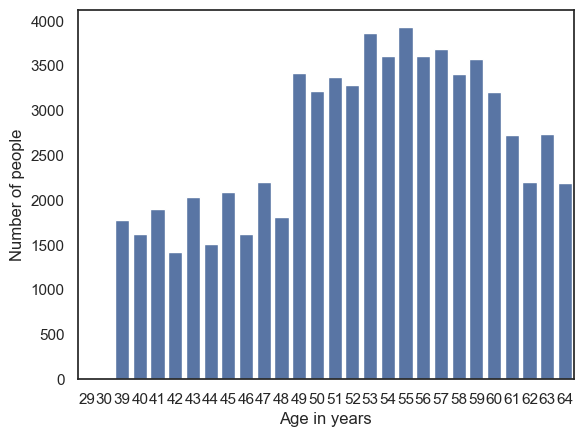

In [5]:
ages_in_years = cardio_data['age'] // 365

ages = pd.value_counts(ages_in_years)
figure = sns.barplot(x=ages.index, y=ages.values)
figure.set_xlabel('Age in years')
figure.set_ylabel('Number of people')

In [6]:
smokers = pd.value_counts(cardio_data['smoke'])
smokers

C:\Users\first\AppData\Local\Temp\ipykernel_10996\2913813338.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  smokers = pd.value_counts(cardio_data['smoke'])


smoke
0    63831
1     6169
Name: count, dtype: int64

C:\Users\first\AppData\Local\Temp\ipykernel_10996\2200919804.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure = sns.distplot(weight_distribution, kde=False, bins=40)


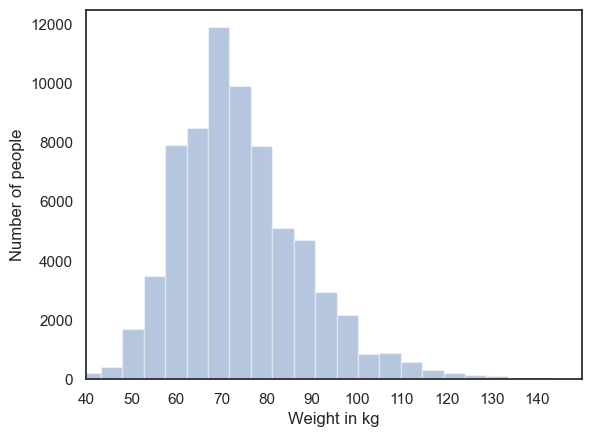

In [7]:
weight_distribution = cardio_data['weight']
figure = sns.distplot(weight_distribution, kde=False, bins=40)
figure.set_xlim(40, 150)
figure.set_xlabel('Weight in kg')
figure.set_ylabel('Number of people')
figure.set_xticks(np.arange(40, 150, 10))

C:\Users\first\AppData\Local\Temp\ipykernel_10996\3156829219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure = sns.distplot(length_distribution, kde=False, bins=40)


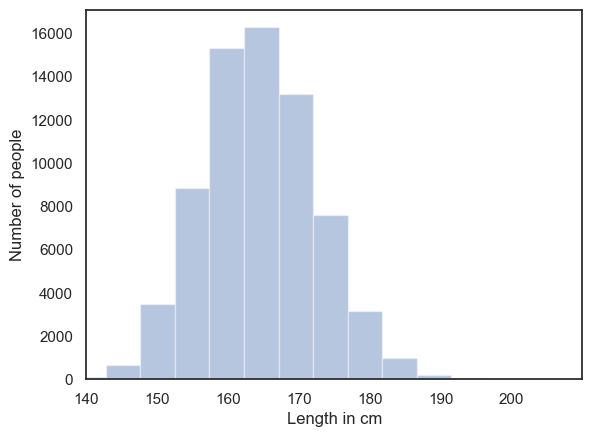

In [8]:
length_distribution = cardio_data['height']
figure = sns.distplot(length_distribution, kde=False, bins=40)
figure.set_xlim(140, 210)
figure.set_xlabel('Length in cm')
figure.set_ylabel('Number of people')
figure.set_xticks(np.arange(140, 210, 10))

In [9]:
female_cardio = cardio_data.groupby("gender").get_group(1)["cardio"].value_counts('cardio')
male_cardio = cardio_data.groupby("gender").get_group(2).value_counts("cardio")
male_cardio

cardio
1    12363
0    12107
Name: count, dtype: int64

<Axes: >

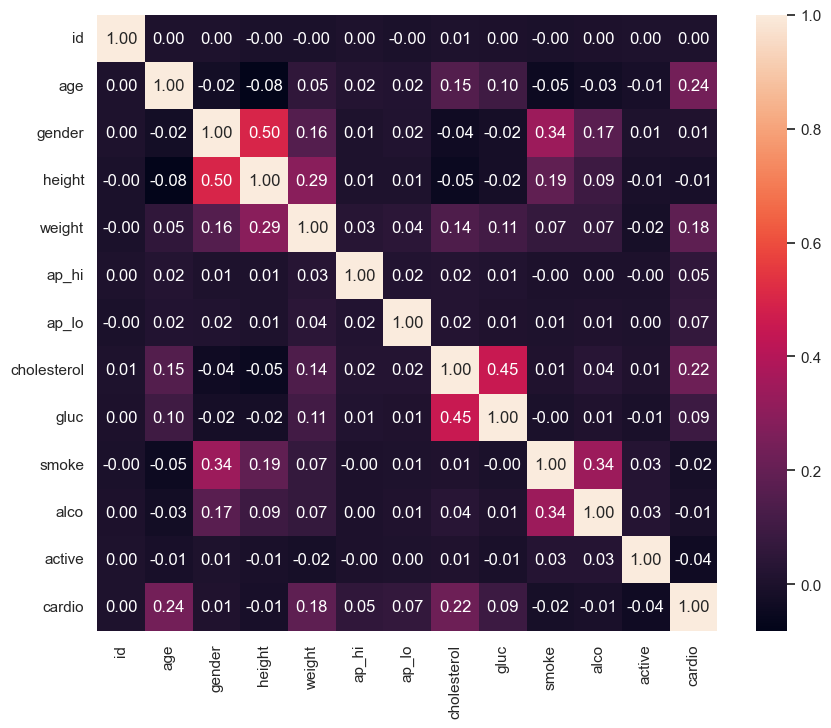

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cardio_data.corr(), annot=True, fmt=".2f")

In [11]:
# cardio_data.drop(['gender', 'cardio'], axis=1, inplace=True)
# cardio_data

## 1.2

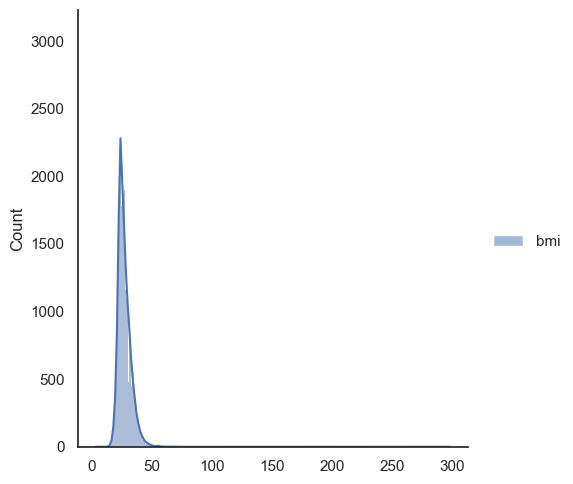

In [12]:
bmi = cardio_data['weight'] / ((cardio_data['height'] / 100) ** 2)
bmi = pd.DataFrame({'bmi': bmi})

sns.displot(bmi, kde=True)

In [13]:
cardio_data = pd.concat([cardio_data, bmi], axis=1)
# cardio_data = cardio_data[(cardio_data['bmi'] >= 15) & (cardio_data['bmi'] <= 100)]

z_scores = stats.zscore(cardio_data['bmi'])
threshold = 3
outliers = cardio_data[abs(z_scores) > threshold]

cleaned_data = cardio_data.drop(outliers.index)

cleaned_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [14]:
bmi_categorical = pd.cut(bmi['bmi'], bins=[18.5, 25, 30, 35, 40, 100], labels=[1, 2, 3, 4, 5])
bmi_categorical = pd.DataFrame({'bmi_categorical': bmi_categorical})
cleaned_data = pd.concat([cleaned_data, bmi_categorical], axis=1)
cleaned_data.dropna(inplace=True)

In [15]:
cleaned_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_categorical
0,0.0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,21.967120,1
1,1.0,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,34.927679,3
2,2.0,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,23.507805,1
3,3.0,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,28.710479,2
4,4.0,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,23.011177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992.0,21074.0,1.0,165.0,80.0,150.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0,29.384757,2
69995,99993.0,19240.0,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0,26.927438,2
69997,99996.0,19066.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0,31.353579,3
69998,99998.0,22431.0,1.0,163.0,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0,27.099251,2


<Axes: >

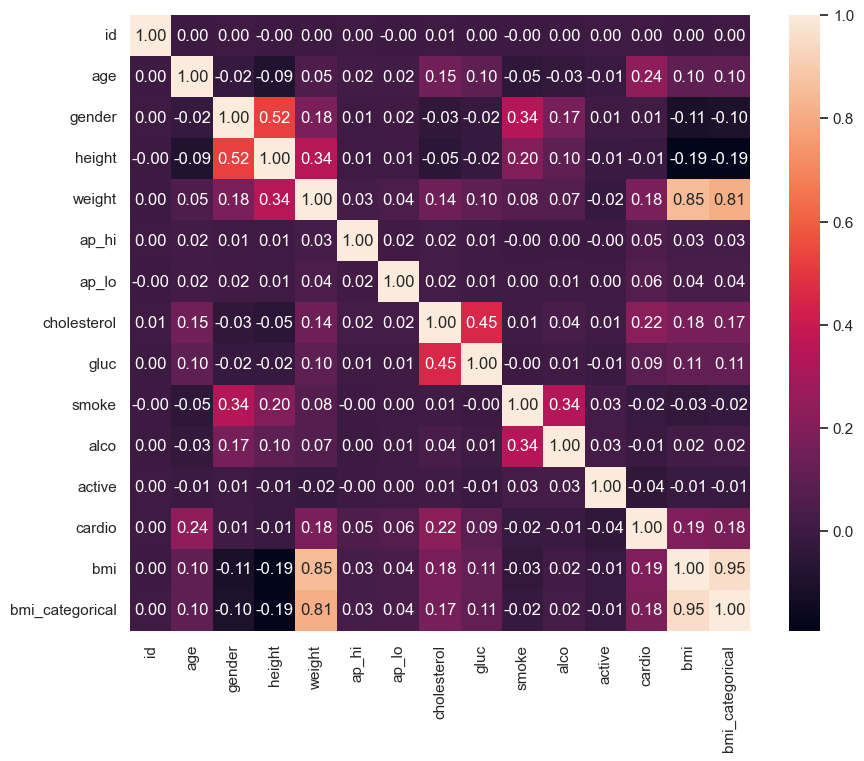

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cleaned_data.corr(), annot=True, fmt=".2f")

In [17]:
blood_pressure_ranges_systolic = pd.cut(cleaned_data['ap_hi'], bins=[0, 120, 130, 140, 160, 180, 250], labels=[1, 2, 3, 4, 5, 6])
blood_pressure_ranges_systolic = pd.DataFrame({'ap_hi_label': blood_pressure_ranges_systolic})

blood_pressure_ranges_diastolic = pd.cut(cleaned_data['ap_lo'], bins=[0, 80, 85, 90, 100, 120, 180], labels=[1, 2, 3, 4, 5, 6])
blood_pressure_ranges_diastolic = pd.DataFrame({'ap_lo_label': blood_pressure_ranges_diastolic})

In [18]:
z_scores = stats.zscore(cleaned_data['ap_hi'])
threshold = 3
outliers = cleaned_data[abs(z_scores) > threshold]

# Remove outliers
remove_ap_hi_outliers_df = cleaned_data.drop(outliers.index)

In [19]:
z_scores = stats.zscore(remove_ap_hi_outliers_df['ap_lo'])
threshold = 3
outliers = remove_ap_hi_outliers_df[abs(z_scores) > threshold]

# Remove outliers
cleaned_data = remove_ap_hi_outliers_df.drop(outliers.index)

In [20]:
cleaned_data = pd.concat([cleaned_data, blood_pressure_ranges_systolic, blood_pressure_ranges_diastolic], axis=1)
cleaned_data.dropna(inplace=True)

In [21]:
cleaned_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_categorical,ap_hi_label,ap_lo_label
0,0.0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,21.967120,1,1,1
1,1.0,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,34.927679,3,3,3
2,2.0,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,23.507805,1,2,1
3,3.0,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,28.710479,2,4,4
4,4.0,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,23.011177,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992.0,21074.0,1.0,165.0,80.0,150.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0,29.384757,2,4,1
69995,99993.0,19240.0,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0,26.927438,2,1,1
69997,99996.0,19066.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0,31.353579,3,5,3
69998,99998.0,22431.0,1.0,163.0,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0,27.099251,2,3,1


<Axes: >

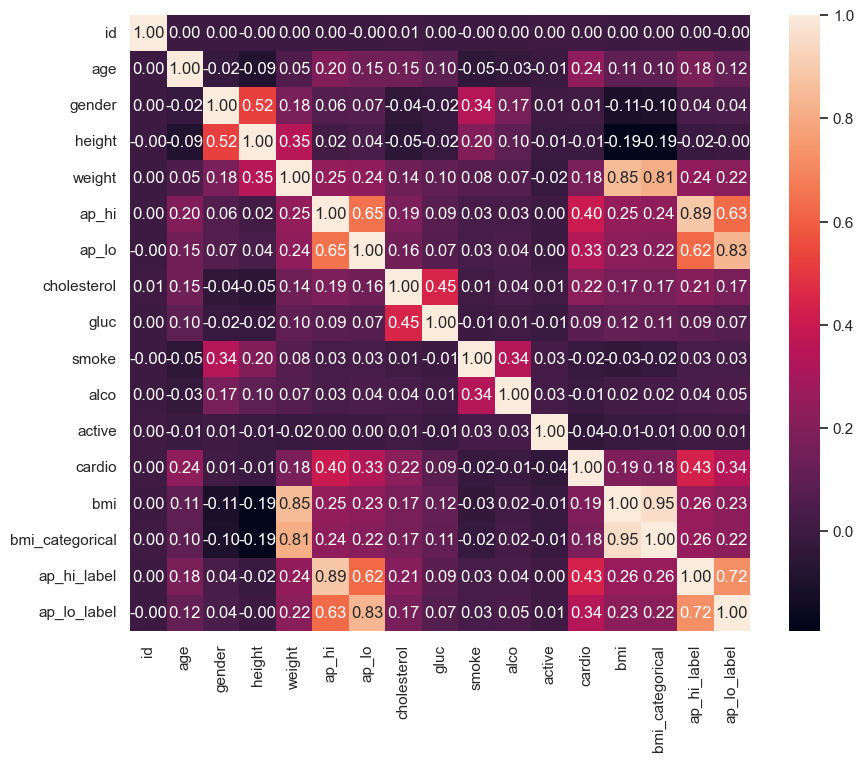

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cleaned_data.corr(), annot=True, fmt=".2f")

In [23]:
copy_one_df = cleaned_data.copy()

copy_one_df = pd.get_dummies(copy_one_df, columns=['ap_hi_label', 'gender','ap_lo_label', 'bmi_categorical'], dtype=int)
copy_one_df.drop(['bmi', 'height', 'weight', 'ap_hi', 'ap_lo'], axis=1, inplace=True)

copy_one_df

,id,age,cholesterol,gluc,smoke,alco,active,cardio,ap_hi_label_1,ap_hi_label_2,...,ap_lo_label_2,ap_lo_label_3,ap_lo_label_4,ap_lo_label_5,ap_lo_label_6,bmi_categorical_1,bmi_categorical_2,bmi_categorical_3,bmi_categorical_4,bmi_categorical_5
0,0.0,18393.0,1.0,1.0,0.0,0.0,1.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,20228.0,3.0,1.0,0.0,0.0,1.0,1.0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2.0,18857.0,3.0,1.0,0.0,0.0,0.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3.0,17623.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,4.0,17474.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992.0,21074.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
69995,99993.0,19240.0,1.0,1.0,1.0,0.0,1.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
69997,99996.0,19066.0,3.0,1.0,0.0,1.0,0.0,1.0,0,0,...,0,1,0,0,0,0,0,1,0,0
69998,99998.0,22431.0,1.0,2.0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
copy_two_df = cleaned_data.copy()
copy_two_df = pd.get_dummies(copy_two_df, columns=['gender'], dtype=int)
copy_two_df.drop(['bmi_categorical', 'height', 'weight', 'ap_hi_label', 'ap_lo_label'], axis=1, inplace=True)
copy_two_df

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_1.0,gender_2.0
0,0.0,18393.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,21.967120,0,1
1,1.0,20228.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,34.927679,1,0
2,2.0,18857.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,23.507805,1,0
3,3.0,17623.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,28.710479,0,1
4,4.0,17474.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,23.011177,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992.0,21074.0,150.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0,29.384757,1,0
69995,99993.0,19240.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0,26.927438,0,1
69997,99996.0,19066.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0,31.353579,0,1
69998,99998.0,22431.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0,27.099251,1,0


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Define the pipelines
pipelines = {
    'lr': Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression())]),
    'knn': Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'nb': Pipeline([('scl', StandardScaler()), ('clf', GaussianNB())]),
}

# Define the parameter grids
param_grids = {
    'lr': {'clf__C': [0.1, 1, 10, 100]},
    'knn': {'clf__n_neighbors': list(range(0, 50)), 'clf__weights': ['uniform', 'distance'], 'clf__metric': ['euclidean', 'manhattan']},
    'nb': {}
}

# Separate features and target
X_one = copy_one_df.drop('cardio', axis=1)
y_one = copy_one_df['cardio']

# Fit the GridSearchCV objects and print the best parameters
for name, pipeline in pipelines.items():
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
    grid.fit(X_one, y_one)
    print(f'{name} pipeline test accuracy: {grid.score(X_one, y_one):.3f}')
    print('Best parameters: ', grid.best_params_)

lr pipeline test accuracy: 0.725
Best parameters:  {'clf__C': 0.1}


KeyboardInterrupt: 

lr pipeline test accuracy: 0.725

Best parameters:  {'clf__C': 0.1}

knn pipeline test accuracy: 1.000

Best parameters:  {'clf__metric': 'manhattan', 'clf__n_neighbors': 48, 'clf__weights': 'distance'}

nb pipeline test accuracy: 0.700

Best parameters:  {}

In [26]:
param_grid_svc = {'clf__C': [0.1, 1, 10], 'clf__kernel': ['rbf']}
pipeline = Pipeline([('scl', StandardScaler()), ('clf', SVC())])

grid = GridSearchCV(pipeline, param_grid_svc, cv=5, n_jobs=-1)
grid.fit(X_one, y_one)
print(f'SVC pipeline test accuracy: {grid.score(X_one, y_one):.3f}')
print('Best parameters: ', grid.best_params_)

SVC pipeline test accuracy: 0.732
Best parameters:  {'clf__C': 1, 'clf__kernel': 'rbf'}


SVC pipeline test accuracy: 0.732

Best parameters:  {'clf__C': 1, 'clf__kernel': 'rbf'}

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Define the pipelines
pipelines = {
    'lr': Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression())]),
    'knn': Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'nb': Pipeline([('scl', StandardScaler()), ('clf', GaussianNB())]),
}

# Define the parameter grids
param_grids = {
    'lr': {'clf__C': [0.1, 1, 10, 100]},
    'knn': {'clf__n_neighbors': list(range(0, 50)), 'clf__weights': ['uniform', 'distance'], 'clf__metric': ['euclidean', 'manhattan']},
    'nb': {}
}

# Separate features and target
X_two = copy_two_df.drop('cardio', axis=1)
y_two = copy_two_df['cardio']

# Fit the GridSearchCV objects and print the best parameters
for name, pipeline in pipelines.items():
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
    grid.fit(X_two, y_two)
    print(f'{name} pipeline test accuracy: {grid.score(X_two, y_two):.3f}')
    print('Best parameters: ', grid.best_params_)

lr pipeline test accuracy: 0.725
Best parameters:  {'clf__C': 1}


c:\Users\first\.virtualenvs\machine-learning-asajad-hussein-dtP5IciK\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\first\.virtualenvs\machine-learning-asajad-hussein-dtP5IciK\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\first\.virtualenvs\machine-learning-asajad-hussein-dtP5IciK\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^

knn pipeline test accuracy: 0.736
Best parameters:  {'clf__metric': 'manhattan', 'clf__n_neighbors': 46, 'clf__weights': 'uniform'}
nb pipeline test accuracy: 0.707
Best parameters:  {}


lr pipeline test accuracy: 0.725

Best parameters:  {'clf__C': 1}

knn pipeline test accuracy: 0.736

Best parameters:  {'clf__metric': 'manhattan', 'clf__n_neighbors': 46, 'clf__weights': 'uniform'}

nb pipeline test accuracy: 0.707

Best parameters:  {}

In [28]:
param_grid_svc = {'clf__C': [0.1, 1, 10], 'clf__kernel': ['rbf']}
pipeline = Pipeline([('scl', StandardScaler()), ('clf', SVC())])

grid = GridSearchCV(pipeline, param_grid_svc, cv=5, n_jobs=-1)
grid.fit(X_two, y_two)
print(f'SVC pipeline test accuracy: {grid.score(X_two, y_two):.3f}')
print('Best parameters: ', grid.best_params_)

SVC pipeline test accuracy: 0.738
Best parameters:  {'clf__C': 1, 'clf__kernel': 'rbf'}


SVC pipeline test accuracy: 0.738

Best parameters:  {'clf__C': 1, 'clf__kernel': 'rbf'}